In [2]:
import pandas as pd
import numpy as np
import datetime as dt


#### 1. Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questionss

In [3]:
url1=r"D:\Python Foundation Case Study 3 - Insurance Claims Case Study\Case Study 3 - Insurance Claims Case Study\claims.csv"
claim=pd.read_csv(url1)
claim

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No
...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012,Other driver error,06/11/2017,Auto,No,Material only,$3059,4.0,Yes
1096,10247193,14818669,Natural causes,03/14/2018,Auto,No,Material only,$1520,2.0,No
1097,79807493,85322831,Other driver error,02/09/2018,Auto,No,Material and injury,$23575,2.0,Yes
1098,69299345,73449366,Other causes,03/21/2018,Auto,Unknown,Material and injury,$25120,1.0,No


In [4]:
url2=r"D:\Python Foundation Case Study 3 - Insurance Claims Case Study\Case Study 3 - Insurance Claims Case Study\cust_demographics.csv"
cust=pd.read_csv(url2)
cust

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold
...,...,...,...,...,...,...
1080,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum
1081,42364152,Female,07-Jul-96,ID,529-462-1635,Silver
1082,19888166,Male,11-Apr-90,WI,712-651-9613,Gold
1083,11256802,Female,22-Oct-64,LA,469-345-5617,Silver


In [6]:
 df = pd.merge(left=claim,right=cust,left_on="customer_id",right_on="CUST_ID",how="outer")
df.drop(columns="CUST_ID",inplace=True)
df.rename(columns={"customer_id":"cust_id"},inplace=True)
df


,claim_id,cust_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment
0,54004764.0,21868593.0,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,Female,12-Jan-79,VT,789-916-8172,Platinum
1,33985796.0,75740424.0,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,Female,13-Jan-70,ME,265-543-1264,Silver
2,53522022.0,30308357.0,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes,Female,11-Mar-84,TN,798-631-4758,Silver
3,63017412.0,30308357.0,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No,Female,11-Mar-84,TN,798-631-4758,Silver
4,13015401.0,47830476.0,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No,Female,01-May-86,MA,413-187-7945,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,22-Jul-80,CO,125-613-7698,Platinum
1103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,04-Jun-84,SC,264-374-5794,Platinum
1104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,25-May-84,NV,649-742-8132,Silver
1105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,06-Aug-96,NH,495-732-2638,Silver


#### 2. Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance..

In [7]:
df["DateOfBirth"] = pd.to_datetime(df.DateOfBirth, format = "%d-%b-%y")
df["claim_date"] = pd.to_datetime(df.claim_date, format = "%m/%d/%Y")
df["Contact"] = pd.to_numeric(df.Contact.str.replace("-",""),downcast='float')
df


,claim_id,cust_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment
0,54004764.0,21868593.0,Driver error,2017-11-27,Auto,No,Material only,$2980,1.0,No,Female,1979-01-12,VT,7.899168e+09,Platinum
1,33985796.0,75740424.0,Crime,2018-10-03,Home,Unknown,Material only,$2980,3.0,No,Female,1970-01-13,ME,2.655431e+09,Silver
2,53522022.0,30308357.0,Other driver error,2018-02-02,Auto,No,Material only,$3369.5,1.0,Yes,Female,1984-03-11,TN,7.986315e+09,Silver
3,63017412.0,30308357.0,Driver error,2018-04-04,Auto,No,Material only,$1950,6.0,No,Female,1984-03-11,TN,7.986315e+09,Silver
4,13015401.0,47830476.0,Natural causes,2018-06-17,Auto,No,Material only,$1680,1.0,No,Female,1986-05-01,MA,4.131878e+09,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,Male,1980-07-22,CO,1.256138e+09,Platinum
1103,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,Female,1984-06-04,SC,2.643746e+09,Platinum
1104,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,Female,1984-05-25,NV,6.497428e+09,Silver
1105,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,Female,1996-08-06,NH,4.957323e+09,Silver


In [8]:
 df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1107 entries, 0 to 1106
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   claim_id             1100 non-null   float64       
 1   cust_id              1100 non-null   float64       
 2   incident_cause       1100 non-null   object        
 3   claim_date           1100 non-null   datetime64[ns]
 4   claim_area           1100 non-null   object        
 5   police_report        1100 non-null   object        
 6   claim_type           1100 non-null   object        
 7   claim_amount         1035 non-null   object        
 8   total_policy_claims  1090 non-null   float64       
 9   fraudulent           1100 non-null   object        
 10  gender               1092 non-null   object        
 11  DateOfBirth          1092 non-null   datetime64[ns]
 12  State                1092 non-null   object        
 13  Contact              1092 non-nul

In [9]:
df.dtypes


claim_id                      float64
cust_id                       float64
incident_cause                 object
claim_date             datetime64[ns]
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                   object
total_policy_claims           float64
fraudulent                     object
gender                         object
DateOfBirth            datetime64[ns]
State                          object
Contact                       float64
Segment                        object
dtype: object

#### 3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign..

df["claim_amount"] = pd.to_numeric(df.claim_amount.str.replace("$",""),downcast='float')
df

#### 4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims..

In [17]:
df["Flag"] = np.where(df.police_report=='Unknown',1,0)
df

,claim_id,cust_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,Flag
0,54004764.0,21868593.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,Female,1979-01-12,VT,7.899168e+09,Platinum,0
1,33985796.0,75740424.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,Female,1970-01-13,ME,2.655431e+09,Silver,1
2,53522022.0,30308357.0,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,Female,1984-03-11,TN,7.986315e+09,Silver,0
3,63017412.0,30308357.0,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,Female,1984-03-11,TN,7.986315e+09,Silver,0
4,13015401.0,47830476.0,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,Female,1986-05-01,MA,4.131878e+09,Silver,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,Male,1980-07-22,CO,1.256138e+09,Platinum,0
1103,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,Female,1984-06-04,SC,2.643746e+09,Platinum,0
1104,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,Female,1984-05-25,NV,6.497428e+09,Silver,0
1105,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,Female,1996-08-06,NH,4.957323e+09,Silver,0


#### 5. One customer can claim for insurance more than once and in each claim, multiple categories of claims can be involved. However, customer ID should remain unique. Retain the most recent observation and delete any duplicated records in the data based on the customer ID columnumn

In [18]:
 df = df.groupby('cust_id').first().reset_index(drop = True)
df

,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,Flag
0,69348631.0,Driver error,2018-04-10,Auto,No,Injury only,NaN,1.0,Yes,Female,1978-05-23,DE,9.628791e+09,Platinum,0
1,40953049.0,Other causes,2018-04-04,Auto,No,Material and injury,39192.0,1.0,Yes,Male,1972-12-20,TX,1.738926e+09,Silver,0
2,45780237.0,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.5,2.0,Yes,Male,1988-07-28,FL,3.645982e+09,Silver,1
3,89833962.0,Other causes,2018-03-21,Auto,Yes,Material and injury,37040.0,1.0,No,Male,1971-08-19,CA,1.873488e+09,Gold,0
4,35782742.0,Other driver error,2018-07-27,Auto,No,Injury only,35250.0,3.0,No,Female,1980-08-10,NC,7.988625e+09,Gold,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1088,4549014.0,Other causes,2018-07-07,Auto,No,Injury only,21480.0,1.0,No,Male,2065-01-28,UT,5.175625e+09,Silver,0
1089,35453672.0,Natural causes,2018-01-06,Auto,Yes,Material and injury,14360.0,1.0,No,Female,2066-06-19,HI,4.577521e+09,Gold,0
1090,37305754.0,Natural causes,2018-04-04,Auto,No,Material only,1242.0,1.0,Yes,Female,2063-11-18,NC,6.432465e+09,Silver,0
1091,22960702.0,Driver error,2017-11-13,Auto,No,Material only,2415.0,2.0,Yes,Male,1995-06-08,OR,3.952466e+09,Gold,0


#### 6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical))

In [19]:
df.isna().sum()


claim_id                0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
gender                 15
DateOfBirth            15
State                  15
Contact                15
Segment                15
Flag                    0
dtype: int64

In [20]:
 df['claim_amount'] = df['claim_amount'].fillna(df['claim_amount'].mean())
df['total_policy_claims'] = df['total_policy_claims'].fillna(df['total_policy_claims'].mode()[0])
df


,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,Flag
0,69348631.0,Driver error,2018-04-10,Auto,No,Injury only,12444.727539,1.0,Yes,Female,1978-05-23,DE,9.628791e+09,Platinum,0
1,40953049.0,Other causes,2018-04-04,Auto,No,Material and injury,39192.000000,1.0,Yes,Male,1972-12-20,TX,1.738926e+09,Silver,0
2,45780237.0,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.500000,2.0,Yes,Male,1988-07-28,FL,3.645982e+09,Silver,1
3,89833962.0,Other causes,2018-03-21,Auto,Yes,Material and injury,37040.000000,1.0,No,Male,1971-08-19,CA,1.873488e+09,Gold,0
4,35782742.0,Other driver error,2018-07-27,Auto,No,Injury only,35250.000000,3.0,No,Female,1980-08-10,NC,7.988625e+09,Gold,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1088,4549014.0,Other causes,2018-07-07,Auto,No,Injury only,21480.000000,1.0,No,Male,2065-01-28,UT,5.175625e+09,Silver,0
1089,35453672.0,Natural causes,2018-01-06,Auto,Yes,Material and injury,14360.000000,1.0,No,Female,2066-06-19,HI,4.577521e+09,Gold,0
1090,37305754.0,Natural causes,2018-04-04,Auto,No,Material only,1242.000000,1.0,Yes,Female,2063-11-18,NC,6.432465e+09,Silver,0
1091,22960702.0,Driver error,2017-11-13,Auto,No,Material only,2415.000000,2.0,Yes,Male,1995-06-08,OR,3.952466e+09,Gold,0


#### 7. Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria Children < 18 Youth 18-30 Adult 30-60 Senior > 600

In [21]:
df["Age"] = (pd.DatetimeIndex(df.claim_date).year - pd.DatetimeIndex(df.DateOfBirth).year)
df.loc[(df.Age < 18) & (df.Age >0),'Age_Group'] = 'Children'
df.loc[(df.Age >=18) & (df.Age <30),'Age_Group'] = 'Youth'
df.loc[(df.Age >=30) & (df.Age <60),'Age_Group'] = 'Adult'
df.loc[(df.Age >=60),'Age_Group'] = 'Senior'
df


,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,Flag,Age,Age_Group
0,69348631.0,Driver error,2018-04-10,Auto,No,Injury only,12444.727539,1.0,Yes,Female,1978-05-23,DE,9.628791e+09,Platinum,0,40.0,Adult
1,40953049.0,Other causes,2018-04-04,Auto,No,Material and injury,39192.000000,1.0,Yes,Male,1972-12-20,TX,1.738926e+09,Silver,0,46.0,Adult
2,45780237.0,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.500000,2.0,Yes,Male,1988-07-28,FL,3.645982e+09,Silver,1,29.0,Youth
3,89833962.0,Other causes,2018-03-21,Auto,Yes,Material and injury,37040.000000,1.0,No,Male,1971-08-19,CA,1.873488e+09,Gold,0,47.0,Adult
4,35782742.0,Other driver error,2018-07-27,Auto,No,Injury only,35250.000000,3.0,No,Female,1980-08-10,NC,7.988625e+09,Gold,0,38.0,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1088,4549014.0,Other causes,2018-07-07,Auto,No,Injury only,21480.000000,1.0,No,Male,2065-01-28,UT,5.175625e+09,Silver,0,-47.0,nan
1089,35453672.0,Natural causes,2018-01-06,Auto,Yes,Material and injury,14360.000000,1.0,No,Female,2066-06-19,HI,4.577521e+09,Gold,0,-48.0,nan
1090,37305754.0,Natural causes,2018-04-04,Auto,No,Material only,1242.000000,1.0,Yes,Female,2063-11-18,NC,6.432465e+09,Silver,0,-45.0,nan
1091,22960702.0,Driver error,2017-11-13,Auto,No,Material only,2415.000000,2.0,Yes,Male,1995-06-08,OR,3.952466e+09,Gold,0,22.0,Youth


#### 8. What is the average amount claimed by the customers from various segments?

In [22]:
 df.groupby('Segment')['claim_amount'].mean().reset_index()


,Segment,claim_amount
0,Gold,12754.951172
1,Platinum,12368.234375
2,Silver,12267.349609


#### 9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018

In [23]:
 df[df.claim_date < "2018-09-10"].groupby('incident_cause')['claim_amount'].mean().reset_index()


,incident_cause,claim_amount
0,Crime,7222.629883
1,Driver error,14012.709961
2,Natural causes,7557.609375
3,Other causes,14482.447266
4,Other driver error,14586.547852


#### 10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes?

In [26]:
 df.loc[(df.incident_cause.str.lower().str.contains("driver") & ((df.State =="TX") | (df.State == "DE") | (df.State == "AK"))),:].groupby("State")["State"].count()

State
AK    10
DE    15
TX    10
Name: State, dtype: int64

#### 11. Draw a pie chart between the aggregated value of claim amount based on gender and segment.Represent the claim amount as a percentage on the pie chartt

    Segment  gender  claim_amount
0      Gold  Female    2109531.50
1      Gold    Male    2622555.50
2  Platinum  Female    2369323.00
3  Platinum    Male    2095609.25
4    Silver  Female    1898223.50
5    Silver    Male    2346279.50 



array([<Axes: ylabel='Female'>, <Axes: ylabel='Male'>], dtype=object)

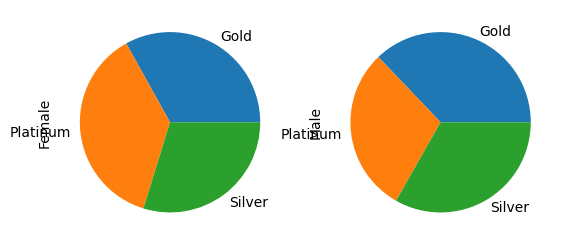

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
pie = df.groupby(['Segment','gender'])['claim_amount'].sum().reset_index()
print(pie,"\n")
pie.pivot(index="Segment", columns= "gender", values= "claim_amount").plot(kind= "pie", subplots= True, legend= False)


#### 12. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chartt

   gender  CountOf_gender
0  Female             221
1    Male             280 



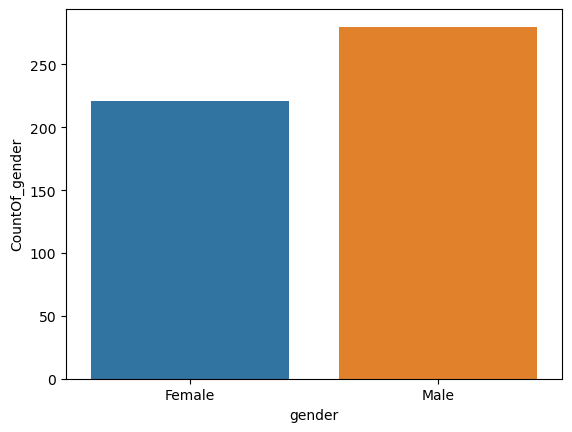

In [29]:
gender_count_df = df.loc[(df.incident_cause.str.lower().str.contains("driver"))].groupby(by = "gender")[["gender"]].count().add_prefix("CountOf_").reset_index()
print(gender_count_df,"\n")
sns.barplot(x = "gender", y = "CountOf_gender", data = gender_count_df )
plt.show()


#### 13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

  Age_Group  fraudulent
0     Adult         511
1     Youth         322
2       nan         260 



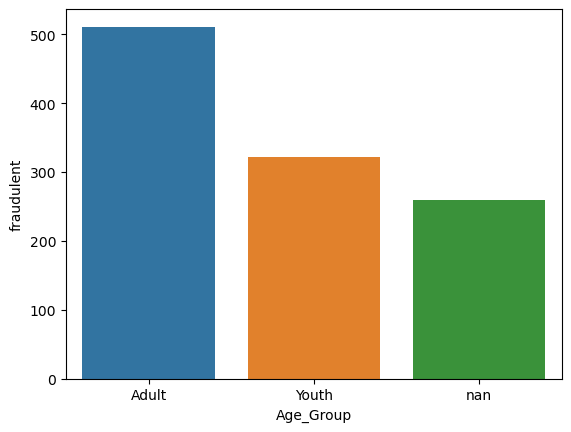

In [30]:
Age_Group_Fraud = df.groupby(by = "Age_Group")[["fraudulent"]].count().reset_index()
print(Age_Group_Fraud,"\n")
sns.barplot(x = "Age_Group", y = "fraudulent", data = Age_Group_Fraud )
plt.show()

#### 14. Visualize the monthly trend of the total amount that has been claimed by the customers.Ensure that on the “month” axis, the month is in a chronological order not alphabetical order.r.

0        4
1        4
2       10
3        3
4        7
        ..
1088     7
1089     1
1090     4
1091    11
1092    10
Name: Month_num, Length: 1093, dtype: int32 

    Month_num  claim_amount
0           1  1.331832e+06
1           2  1.156579e+06
2           3  1.348315e+06
3           4  1.276020e+06
4           5  1.115035e+06
5           6  1.317728e+06
6           7  1.382493e+06
7           8  9.134147e+05
8           9  9.803902e+05
9          10  1.428671e+06
10         11  6.259234e+05
11         12  7.256858e+05 



<Axes: xlabel='Month_num'>

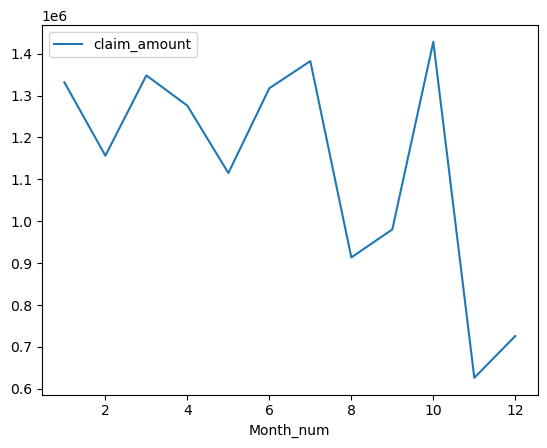

In [31]:
df['Month_num'] = pd.DatetimeIndex(df.claim_date).month
print(df['Month_num'],"\n")
trend = df.groupby('Month_num')['claim_amount'].sum().reset_index()
print(trend,"\n")
pd.pivot_table(trend,index='Month_num',values="claim_amount").plot(kind ="line")


####  15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.s.

                  Fraud_claim_amount
gender Age_Group                    
Female Adult            16291.297852
       Youth             7596.261230
       nan               6440.328613
Male   Adult            17120.050781
       Youth            10681.518555
       nan              16923.859375 

                  Non_Fraud_claim_amount
gender Age_Group                        
Female Adult                12419.394531
       Youth                12521.352539
       nan                  12301.959961
Male   Adult                12456.263672
       Youth                12215.216797
       nan                  11599.629883 

                  Fraud_claim_amount  Non_Fraud_claim_amount
gender Age_Group                                            
Female Adult            16291.299805            12419.400391
       Youth             7596.259766            12521.349609
       nan               6440.330078            12301.959961
Male   Adult            17120.050781            12456.259766
      

array([<Axes: title={'center': 'Fraud_claim_amount'}, xlabel='gender,Age_Group'>,
       <Axes: title={'center': 'Non_Fraud_claim_amount'}, xlabel='gender,Age_Group'>],
      dtype=object)

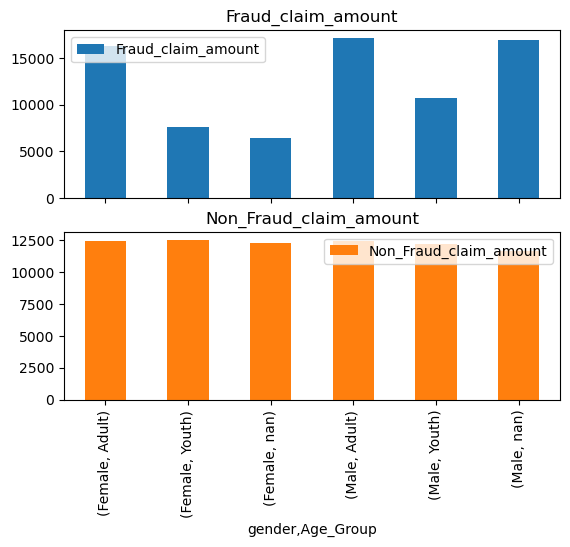

In [32]:
f = df[(df.fraudulent=="Yes")].groupby(["gender","Age_Group"])[["claim_amount"]].mean().add_prefix("Fraud_")
print(f,"\n")
nf = df[(df.fraudulent=="No")].groupby(["gender","Age_Group"])[["claim_amount"]].mean().add_prefix("Non_Fraud_")
print(nf,"\n")
f_nf=round(pd.merge(f,nf,on=["gender","Age_Group"]),2)
print(f_nf,"\n")
f_nf.plot(kind="bar", subplots= True, legend= True)

#### Based on the conclusions from exploratory analysis as well as suitable statistical tests, answer the below questions. Please include a detailed write-up on the parameters taken into consideration,the Hypothesis testing steps, conclusion from the p-values and the business implications of the statements.ts.

In [33]:
 import scipy.stats as st

#### 16. Is there any similarity in the amount claimed by males and females?

In [34]:
 # Two sample t-test:
# Data values must be independent. Measurements for one observation do not affect measurements for any other observation.
# Data in each group must be obtained via a random sample from the population.
# Data in each group are normally distributed.
# Data values are continuous.
# The variances for the two independent groups are equal.
18
female = df['claim_amount'].loc[df['gender']=="Female"]
print(female,"\n")
male = df['claim_amount'].loc[df['gender']=="Male"]
print(male,"\n")
st.ttest_ind(female, male, equal_var=False)
#Conclusion:- As the significance value of t test is greater than 0.05 we can safely conclude that there is a similarity in amount claimed by males and females.


0       12444.727539
4       35250.000000
7       21190.000000
9        2507.000000
10      25010.000000
            ...     
1083    20033.000000
1084     3139.500000
1085     1495.000000
1089    14360.000000
1090     1242.000000
Name: claim_amount, Length: 527, dtype: float32 

1       39192.0
2        1621.5
3       37040.0
5        2630.0
6        2920.0
         ...   
1081     2370.0
1087     2260.0
1088    21480.0
1091     2415.0
1092     2310.0
Name: claim_amount, Length: 551, dtype: float32 



TtestResult(statistic=-0.8851784202517038, pvalue=0.3762582031289209, df=1075.8339106712865)

#### 17. Is there any relationship between age category and segment?

In [35]:
# Chi Square test:
# H0 = No relation between category and segment
# Ha = There is a relationship between category and segment
c = pd.crosstab(df.Age_Group, df.Segment, margins = True)
print(c,"\n")
st.chi2_contingency(observed= c)
#Conclusion:- Since the significance value of the test is greter than 0.05, we fail reject the null hypothesis. Therefore there is no relationship between age category and segment


Segment    Gold  Platinum  Silver   All
Age_Group                              
Adult       186       161     164   511
Youth       104       117     101   322
nan          81        83      81   245
All         371       361     346  1078 



Chi2ContingencyResult(statistic=2.6484309562980695, pvalue=0.9766215974920885, dof=9, expected_freq=array([[ 175.86363636,  171.12337662,  164.01298701,  511.        ],
       [ 110.81818182,  107.83116883,  103.35064935,  322.        ],
       [  84.31818182,   82.04545455,   78.63636364,  245.        ],
       [ 371.        ,  361.        ,  346.        , 1078.        ]]))

#### 18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000..

In [36]:
df['year'] = pd.DatetimeIndex(df.claim_date).year
print(df['year'],"\n")
CY = df.loc[df.year == 2018]["claim_amount"]
print(CY,"\n")
PY = df.loc[df.year == 2017]["claim_amount"]
print(PY,"\n")
CY.corr(other= PY)
#Conclusion:- There is no correlation between Current Year and Previous year

0       2018
1       2018
2       2017
3       2018
4       2018
        ... 
1088    2018
1089    2018
1090    2018
1091    2017
1092    2018
Name: year, Length: 1093, dtype: int32 

0       12444.727539
1       39192.000000
3       37040.000000
4       35250.000000
5        2630.000000
            ...     
1085     1495.000000
1088    21480.000000
1089    14360.000000
1090     1242.000000
1092     2310.000000
Name: claim_amount, Length: 488, dtype: float32 

2        1621.5
7       21190.0
8        2490.0
10      25010.0
11      30540.0
         ...   
1080     2840.0
1081     2370.0
1086     1710.0
1087     2260.0
1091     2415.0
Name: claim_amount, Length: 605, dtype: float32 



nan

####  19. Is there any difference between age groups and insurance claims? 

In [37]:
 # ANOVA:
# H0 = No relation between category and segment
# Ha = There is a relationship between category and segment
a1 = df['total_policy_claims'].loc[df['Age_Group']=="Youth"]
print(a1,"\n")
a2 = df['total_policy_claims'].loc[df['Age_Group']=="Adult"]
print(a1,"\n")
st.f_oneway(a1,a2)
#Conclusion:- Since the significance value of the test is greater than 0.05, we fail reject the null hypothesis. Therefore, there is no difference between age groups and insurance claims or No influence of age groups on insurance claims

2       2.0
5       1.0
7       1.0
11      1.0
12      3.0
       ... 
1083    3.0
1084    3.0
1087    1.0
1091    2.0
1092    1.0
Name: total_policy_claims, Length: 322, dtype: float64 

2       2.0
5       1.0
7       1.0
11      1.0
12      3.0
       ... 
1083    3.0
1084    3.0
1087    1.0
1091    2.0
1092    1.0
Name: total_policy_claims, Length: 322, dtype: float64 



F_onewayResult(statistic=0.1604924667906191, pvalue=0.6888064919091371)

#### 20. Is there any relationship between total number of policy claims and the claimed amount??

In [38]:
df.total_policy_claims.corr(other= df.claim_amount)
#Conclusion:- As the correlation is negative the number of policy claims in inversely propotional to the claimed amount.


-0.016922128934557943